In [34]:
%matplotlib interactive
import os
import sys

import numpy as np
import io
import time

from Database import *

import pandas as pd

os.environ['dropboxPath'] = '/home/mrware/ANAPC/online/Dropbox'
import matplotlib.pyplot as plt
sys.path.insert(0, os.environ['dropboxPath'] + '/Code/mattsTools')
from plotStyles import *

KeyError: 'interactive'

In [16]:
def integratedMPCCD(det, tags, hightag=201802, equip = 'xfel_bl_3_tc_bm_2_pd/charge'):
    objReader = olpy.StorageReader(det)
    objBuffer = olpy.StorageBuffer(objReader)
    
    tag0 = tags[0]
    realtag = objReader.collect(objBuffer, tag0)
    detArray = objBuffer.read_det_data(0) 
    for tag in tags[1:]:
        try:
            realtag = objReader.collect(objBuffer, tag)
            detArray += objBuffer.read_det_data(0) 
        except (olpy.APIError) as ex:
            raise Exception(str(ex))
        except Exception as ex:
            raise Exception(str(ex))
        
    return detArray
    
    

In [17]:
getDetectorList( 3 , getNewestRun(3) )

('ACQIRIS-41417', 'MPCCD-1-1-004', 'MPCCD-1B1-1-012', 'MPCCD-1B1-M03-004')

In [18]:
tagHigh = getNewestTag( 'xfel_bl_3_tc_bm_2_pd/charge' )
tagLow = tagHigh - 100
tagRange = (tagLow, tagHigh)
tags = [ tag for tag in range(tagRange[0],tagRange[1]) ]

iM = integratedMPCCD( 'MPCCD-1-1-010' , tags  )

In [27]:
x = np.arange(iM.shape[0])
y = np.arange(iM.shape[1])

XX,YY = np.meshgrid(x,y)

None None


/home/jglownia/local/opt/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


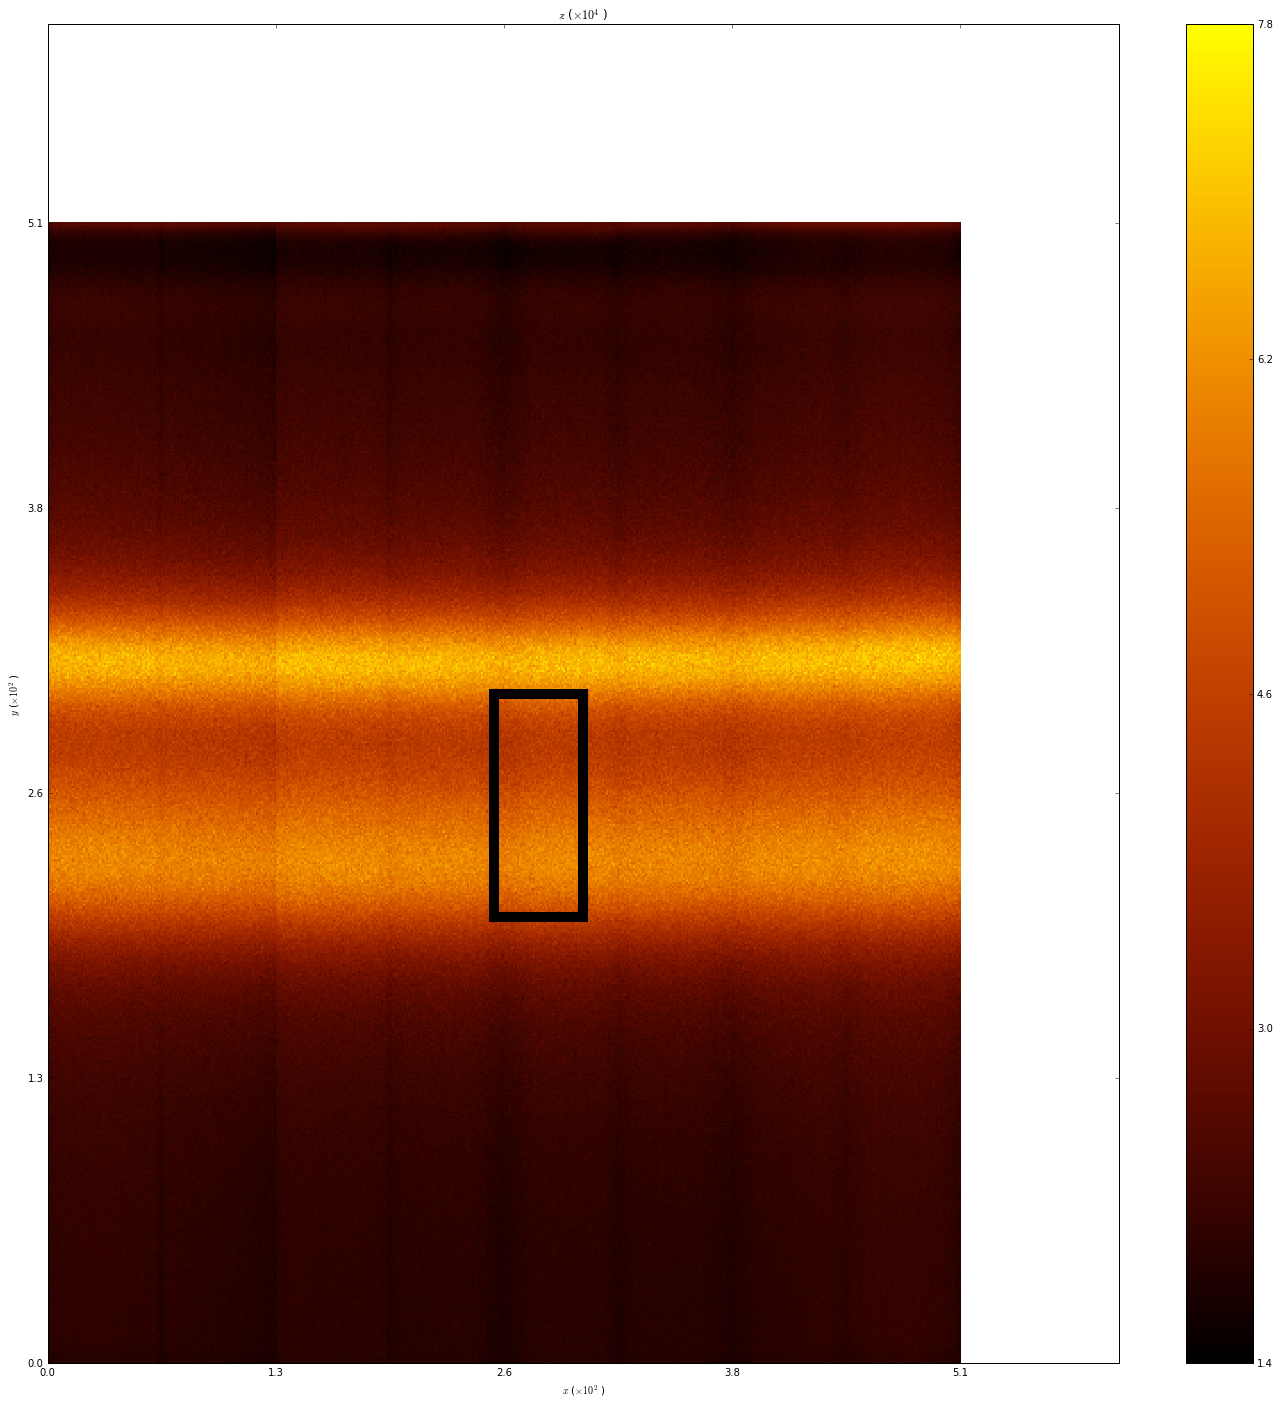

In [42]:
colorPlot( x , y , iM, xIn=24, yIn=24 )

X1 = 250
X2 = 300
Y1 = 200
Y2 = 300

DX = X2-X1
DY = Y2-Y1

import matplotlib.patches as patch

p=patch.Rectangle( (X1,Y1) , width = DX , height= DY , fill=False , linewidth = 10)
ax = plt.gca()
ax.add_patch(p)



KeyError: 'help'